In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu

In [86]:
df = pd.read_csv(r"C:\Users\ruben\OneDrive\Desktop\Loan approvval\credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [87]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [88]:
categorical_columns = df.select_dtypes(include="object").columns

for col in categorical_columns:
    contingency = pd.crosstab(df[col], df["loan_status"])
    woe = np.log((contingency[0] / contingency[0].sum()) / (contingency[1] / contingency[1].sum()))
    df[col + '_woe'] = df[col].map(woe)

df["cb_person_default_on_file"] = df["cb_person_default_on_file"].map({"Y": 1, "N": 0})
df.drop(categorical_columns, axis=1, inplace=True)

In [90]:
df["person_emp_length"] = df["person_emp_length"].fillna(df["person_emp_length"].median())
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].median())

In [91]:
df.loc[df["person_emp_length"] > 60, "person_emp_length"] = df["person_emp_length"].median()

In [73]:
sns.catplot(x="loan_intent", y="loan_int_rate", data=df)

ValueError: Could not interpret value `loan_intent` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='loan_status', ylabel='loan_grade'>

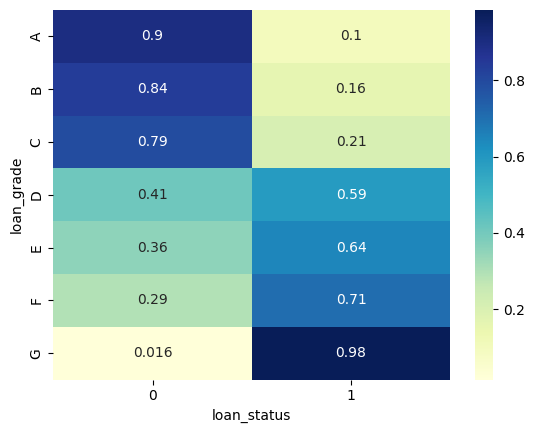

In [9]:
sns.heatmap(crosstab, annot=True, cmap="YlGnBu")

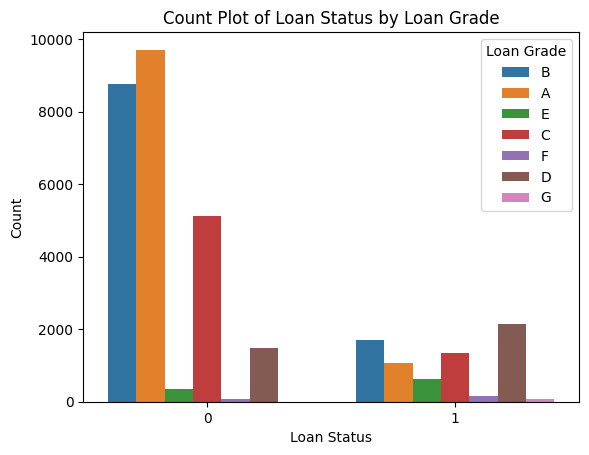

In [56]:
sns.countplot(data=df, x="loan_status", hue="loan_grade")
plt.title("Count Plot of Loan Status by Loan Grade")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.legend(title="Loan Grade")
plt.show()

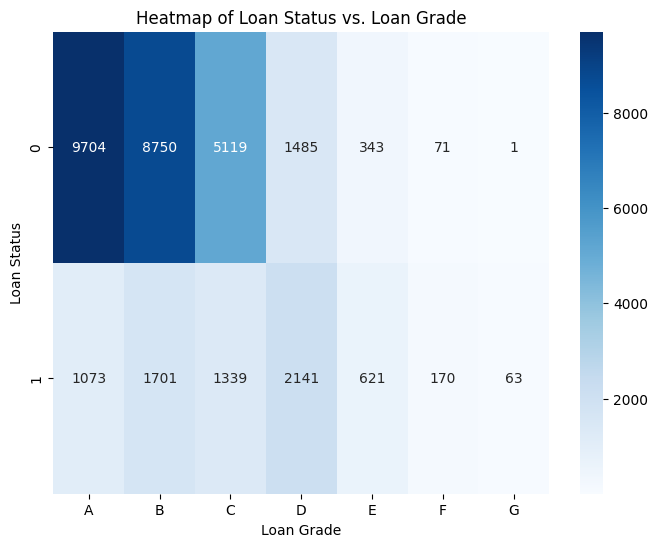

In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of counts
crosstab = pd.crosstab(df["loan_status"], df["loan_grade"])

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap of Loan Status vs. Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Loan Status")
plt.show()

<Axes: xlabel='person_emp_length', ylabel='loan_int_rate'>

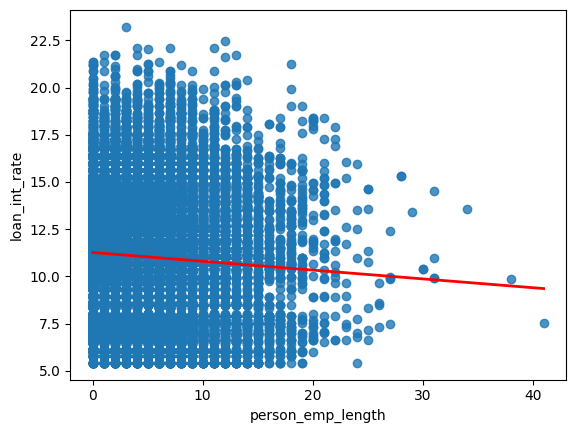

In [10]:
sns.regplot(x="person_emp_length", y="loan_int_rate", data=df, line_kws={'color': 'red', 'linewidth': 2}, ci=None)

<Axes: xlabel='loan_int_rate', ylabel='Count'>

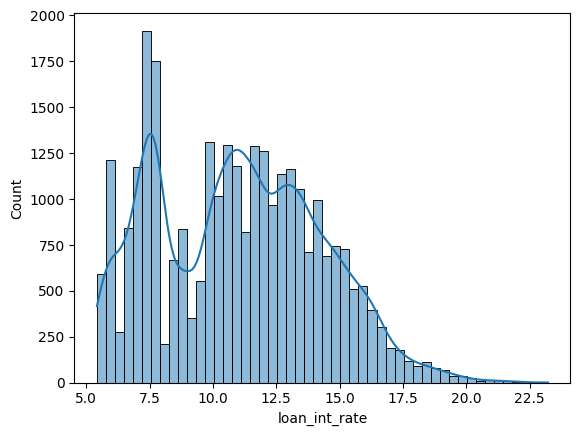

In [17]:
df[df["loan_int_rate"].isna()]
sns.histplot(df["loan_int_rate"], kde=True, bins=50)

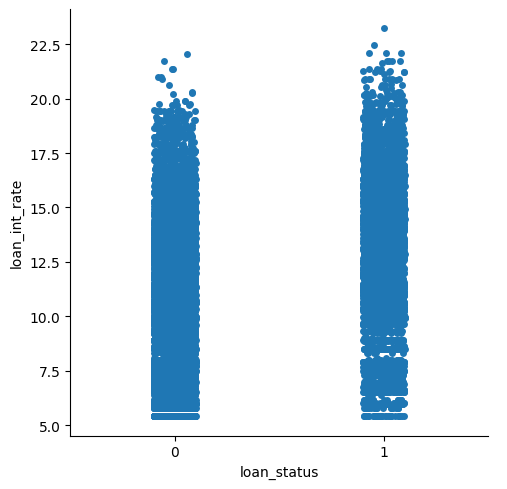

In [18]:
sns.catplot(data=df, x="loan_status", y="loan_int_rate")

In [25]:
df.groupby("loan_status")["loan_int_rate"].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
loan_status,,,,
0,5.42,10.435999,10.59,22.06
1,5.42,13.060207,13.49,23.22


In [26]:
import pandas as pd
from scipy.stats import ttest_ind, levene, mannwhitneyu
import matplotlib.pyplot as plt
import scipy.stats as stats

# Drop NaN values
group_0 = df[df["loan_status"] == 0]["loan_int_rate"].dropna()
group_1 = df[df["loan_status"] == 1]["loan_int_rate"].dropna()

# Check equal variance
stat, p_value_var = levene(group_0, group_1)
print(f"Levene's test: statistic = {stat:.4f}, p-value = {p_value_var:.4f}")

# Perform t-test or Mann-Whitney U test
if p_value_var > 0.05:  # Equal variances
    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=True)
else:  # Unequal variances (Welch's t-test)
    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)

print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Non-parametric test if necessary
if p_value < 0.05:  # If t-test shows significance
    u_stat, p_value_mwu = mannwhitneyu(group_0, group_1)
    print(f"Mann-Whitney U test: U-statistic = {u_stat:.4f}, p-value = {p_value_mwu:.4f}")

Levene's test: statistic = 66.9625, p-value = 0.0000
T-test: t-statistic = -57.7566, p-value = 0.0000
Mann-Whitney U test: U-statistic = 41146343.5000, p-value = 0.0000


In [95]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df['fold'] = -1

for fold, (train_idx, val_idx) in enumerate(skf.split(X=df, y=df['loan_status'])):
    df.loc[val_idx, 'fold'] = fold

df["fold"].value_counts().sort_index()

fold
0    6517
1    6516
2    6516
3    6516
4    6516
Name: count, dtype: int64